# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

#### A. Loading the Data

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Data/Wholesale customers data.csv')

#### B. EDA Analaysis

In [14]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [16]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


- Highest sale on freshness and Grocery
- Least sale on delicassen

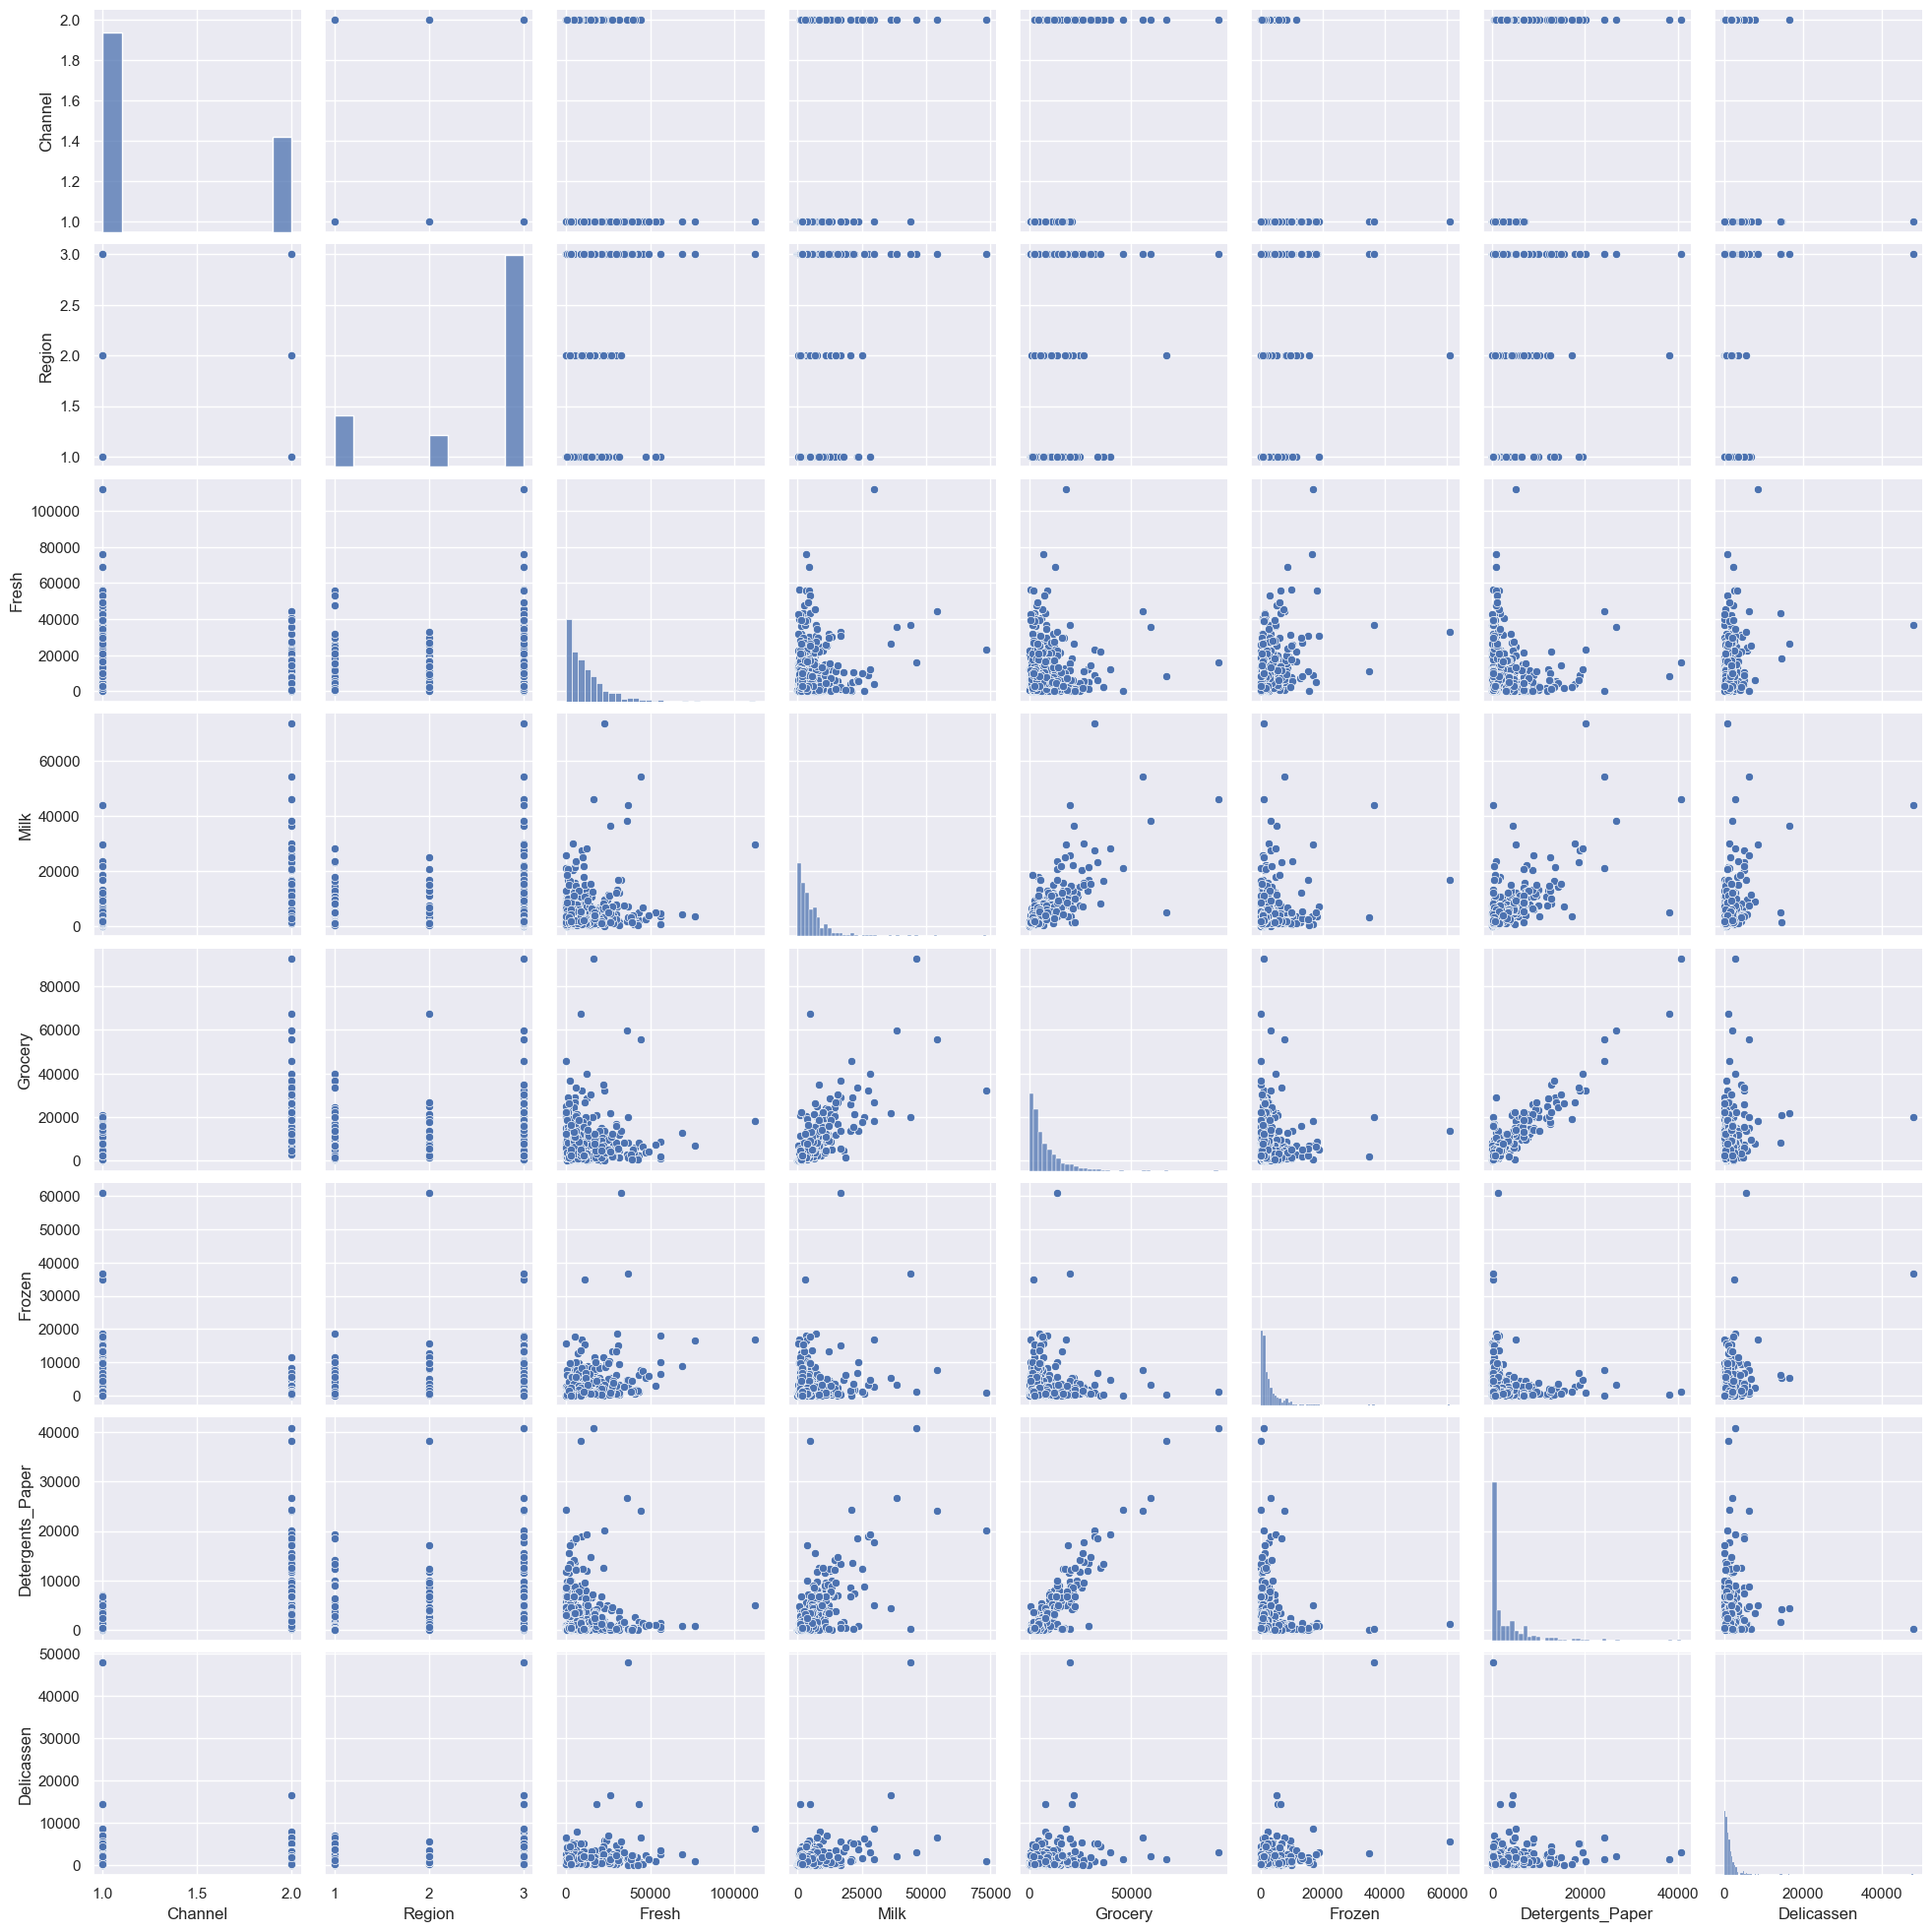

In [10]:
sns.set_theme(style='darkgrid', palette='deep')
sns.pairplot(data=df,
            diag_kind='hist'
            )

plt.show()

- Outlier detect in the dataset--> perform Interquartile to remove outlier (googled the technique)
- Dropping df['Channel'] and df['Region']--> discrete data compare to the continuous data like the other data --> simplified the model

### Data Cleaning

- Plot boxplot to examine the data

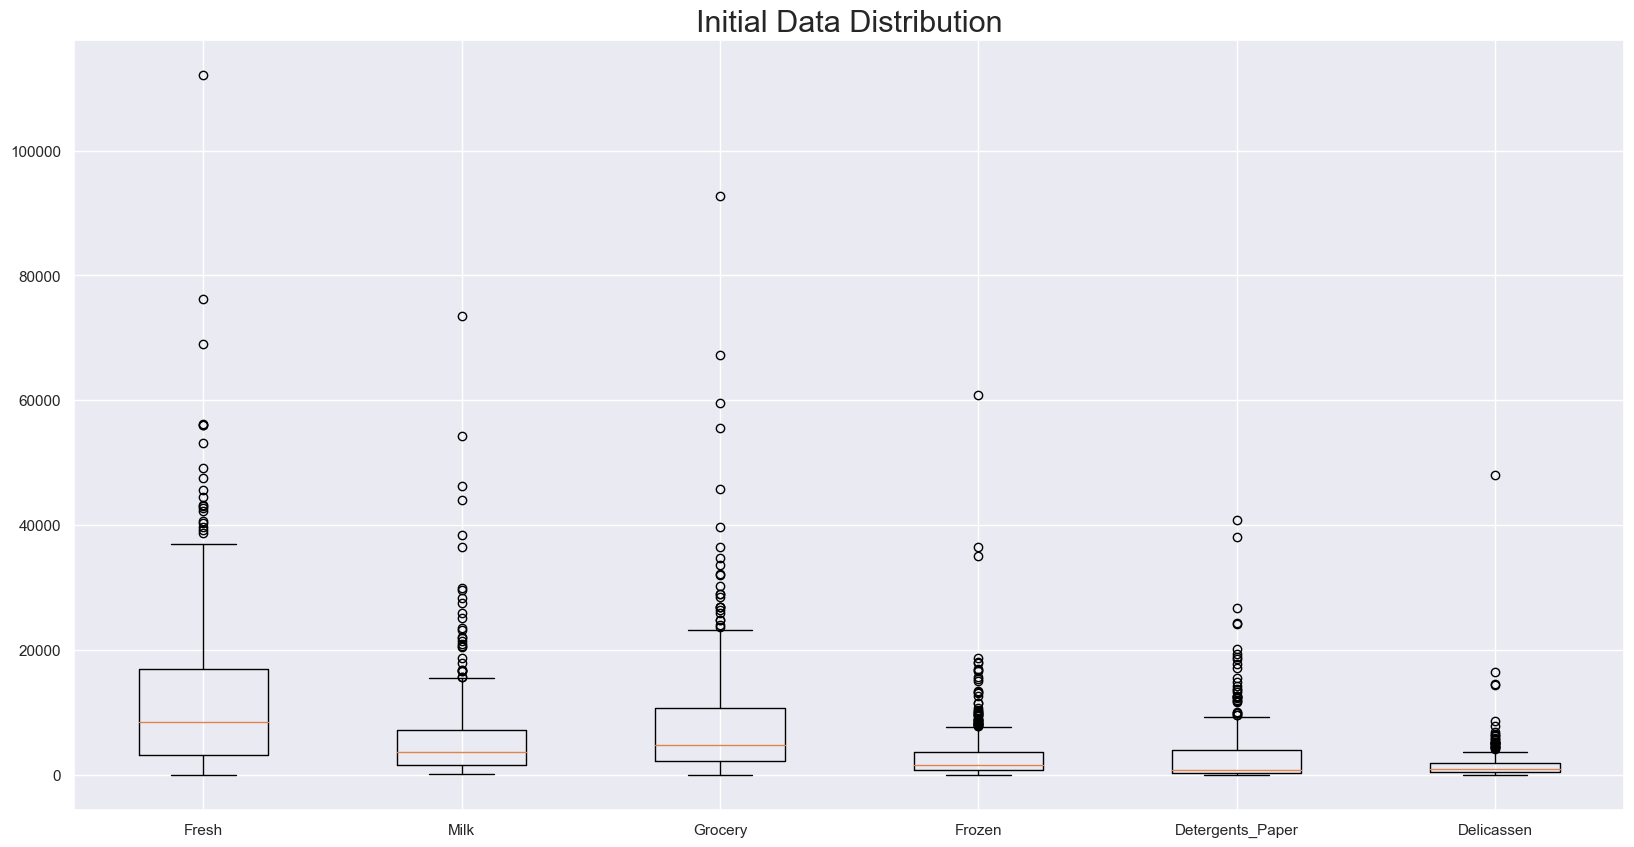

In [17]:
num_data= df.drop(['Channel','Region'], axis=1)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.boxplot(num_data)
ax.set_xticklabels(num_data.columns)
plt.title('Initial Data Distribution', fontsize = 22);

- Using Interquartile to remove outlier

In [18]:
def clean_data_iqr(df, columns, factor=1.5):
    for col in columns:
        A1 = df[col].quantile(0.25)
        A3 = df[col].quantile(0.75)
        IQR = A3 - A1
        lower_bound = A1 - factor * IQR
        upper_bound = A3 + factor * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [21]:
column=['Delicassen', 'Milk', 'Grocery', 'Fresh', 'Detergents_Paper']
df_mod= clean_data_iqr(df, columns=column, factor=2.0)
df_mod.shape

(379, 8)

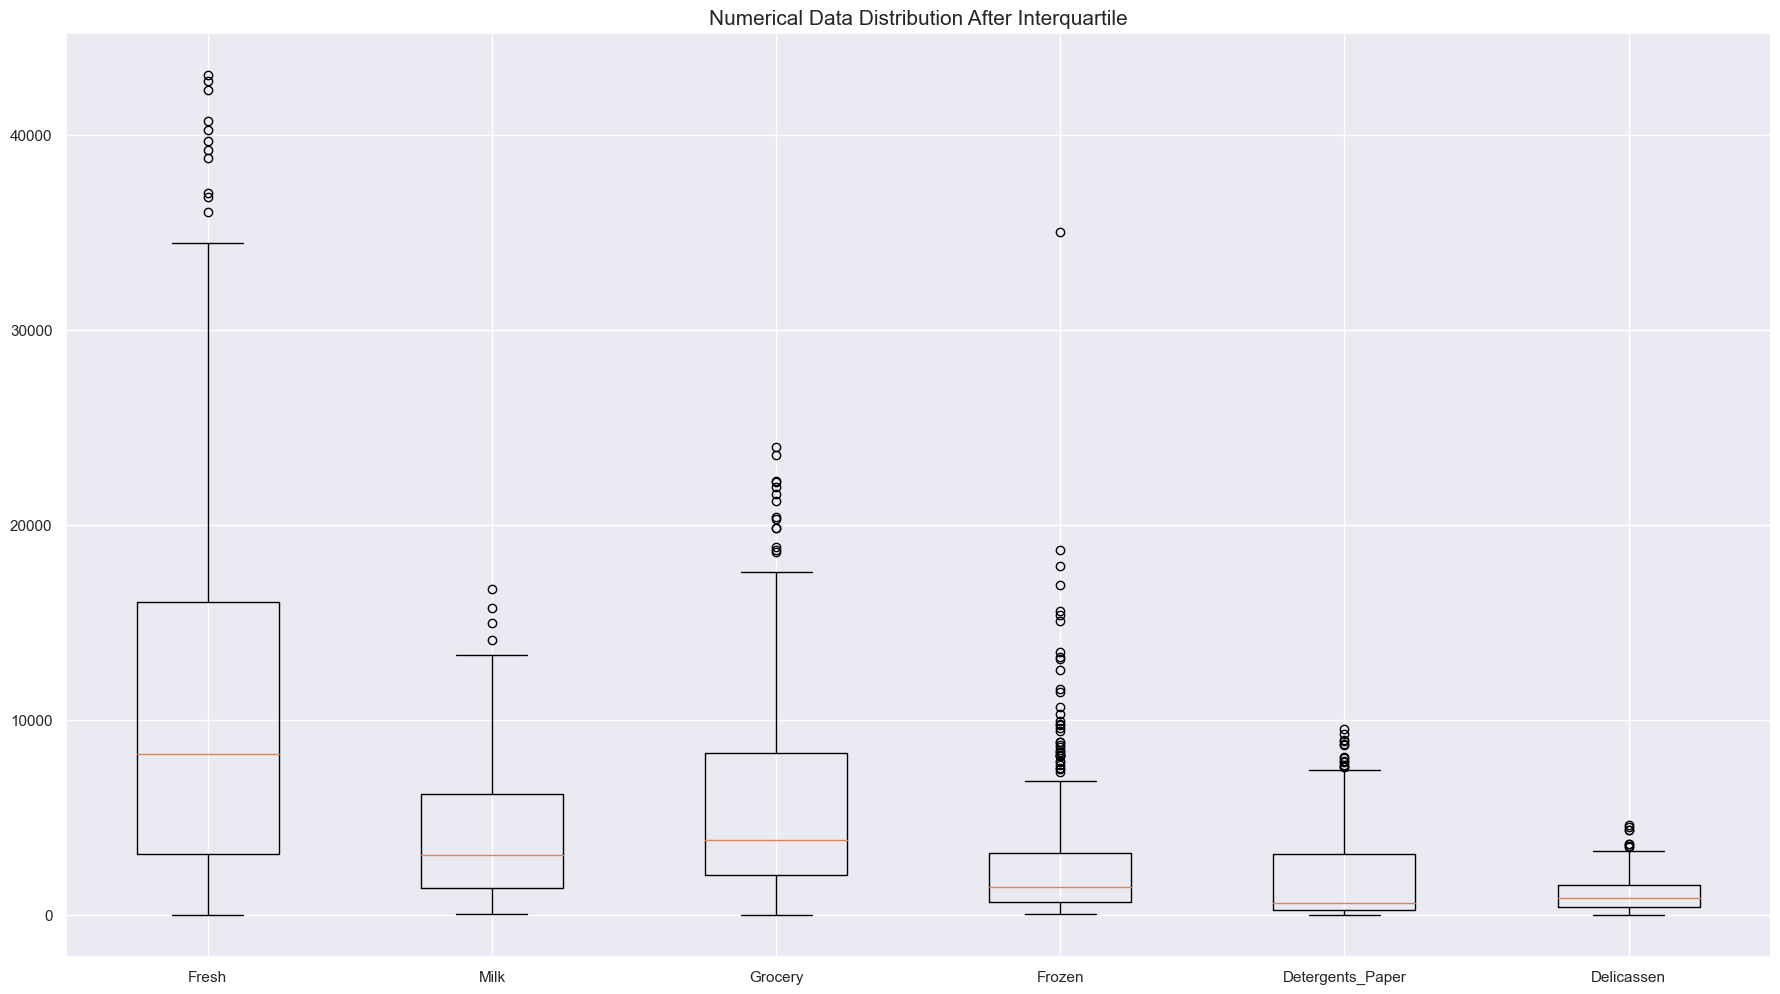

In [28]:
data= df_mod.drop(['Channel','Region'], axis=1)
fig = plt.figure(figsize=(22, 12))
ax = fig.add_subplot(111)
plt.boxplot(data)
ax.set_xticklabels(data.columns)
plt.title('Numerical Data Distribution After Interquartile', fontsize = 15);

- There are extreme outliers.

In [31]:
# Remove outliers of frozen
df_mod = df_mod[df_mod['Frozen'] <= 20000]

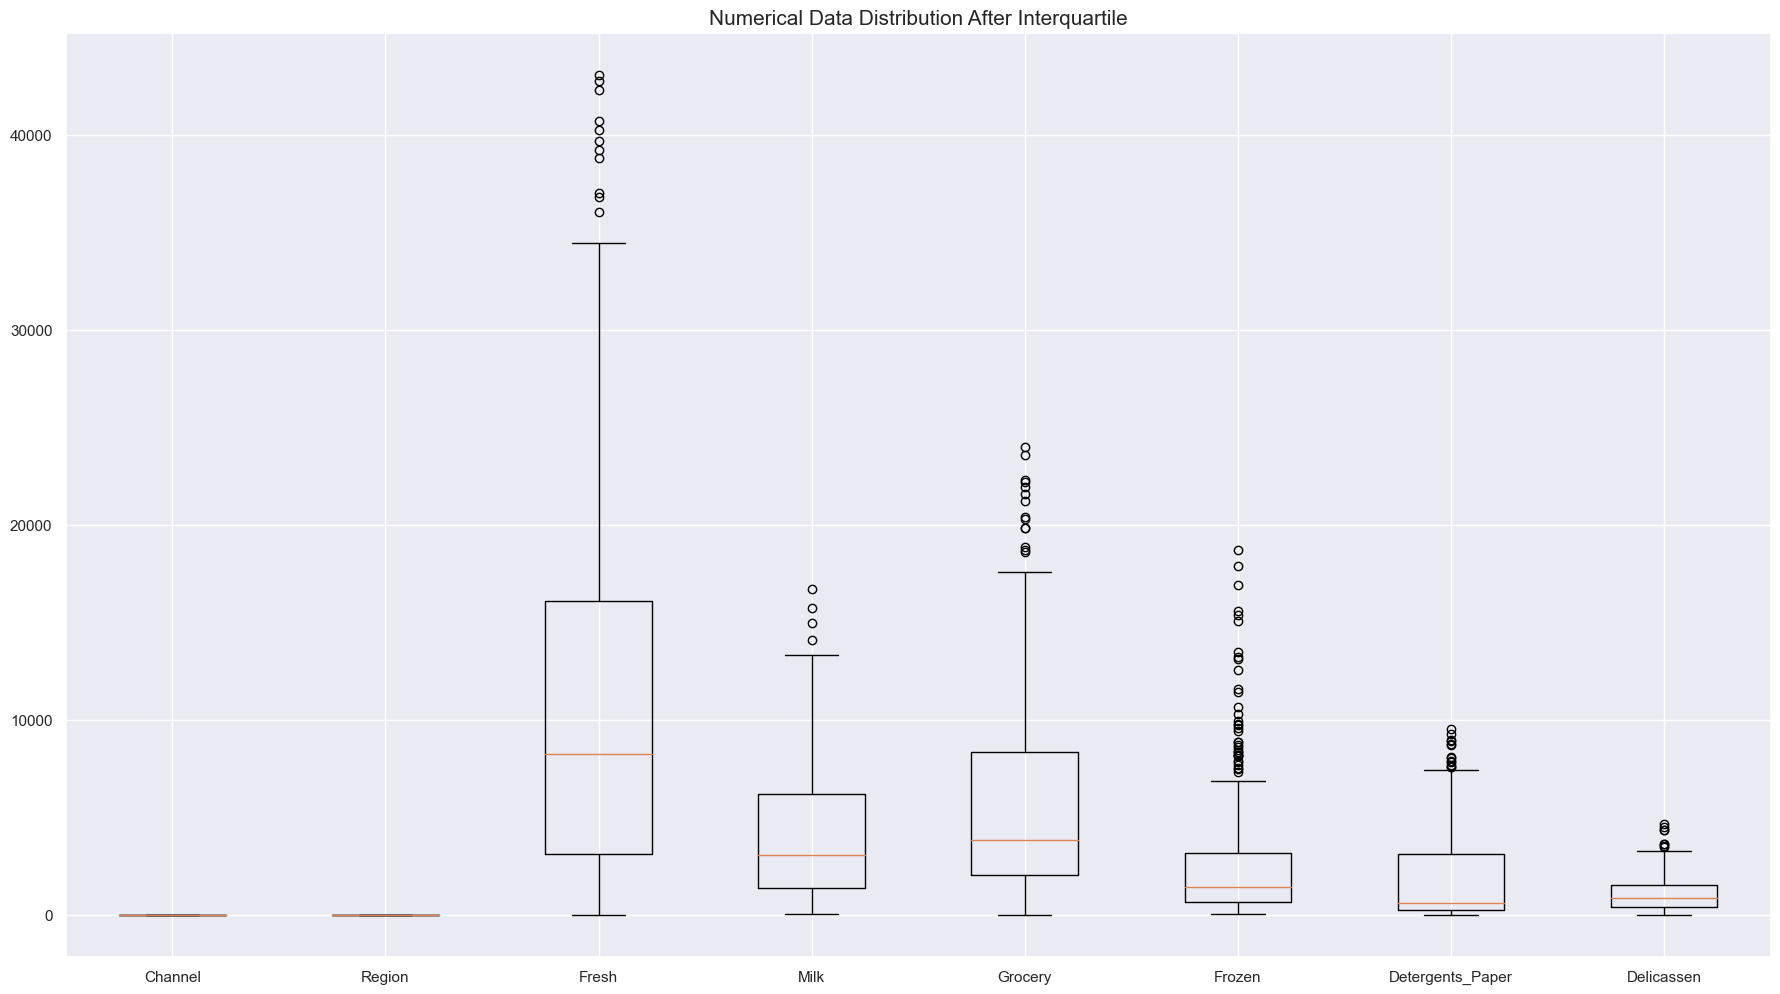

In [33]:
data= df_mod
fig = plt.figure(figsize=(22, 12))
ax = fig.add_subplot(111)
plt.boxplot(data)
ax.set_xticklabels(data.columns)
plt.title('Numerical Data Distribution After Interquartile', fontsize = 15);

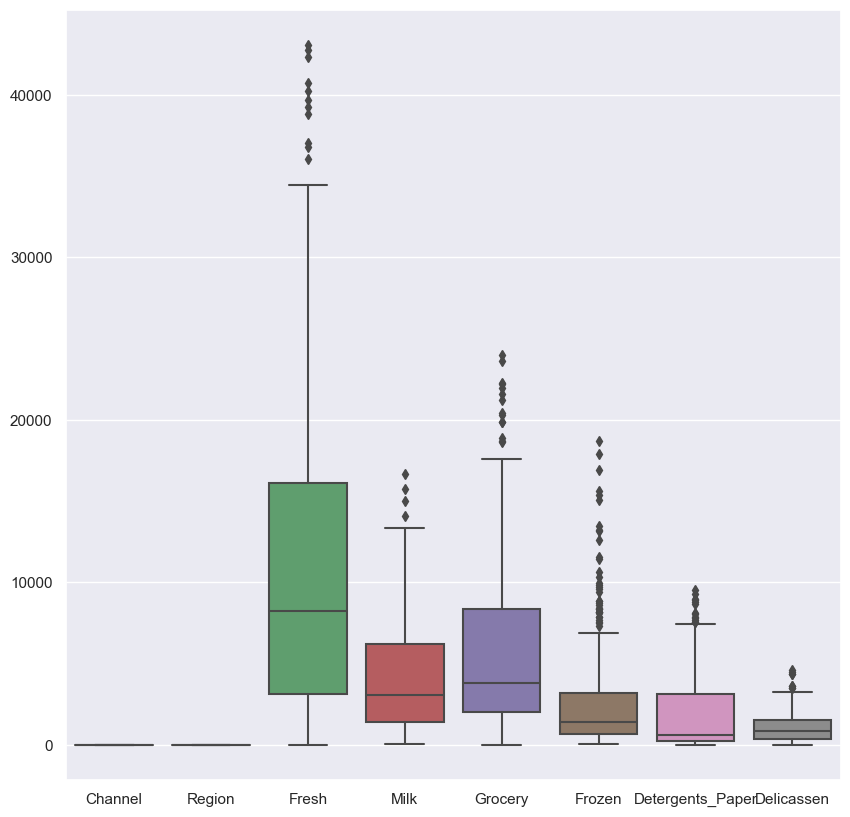

In [35]:
# checking outliers by 2nd plot
plt.figure(figsize=(10, 10))
gr = sns.boxplot(data= df_mod)

### C. Feature Engineering after EDA

<Axes: >

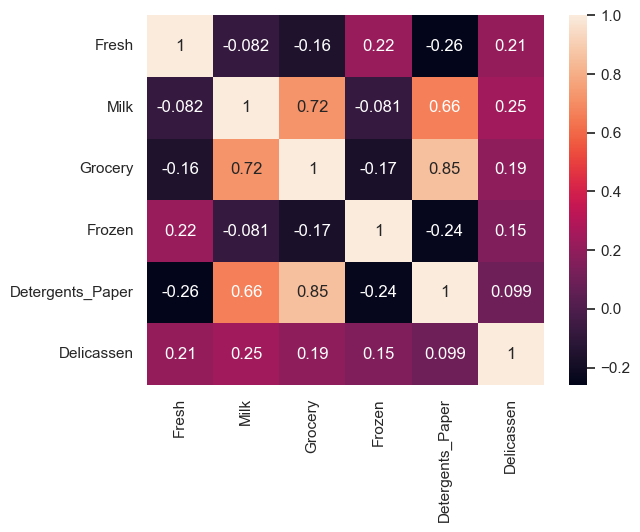

In [44]:
sns.heatmap(correlation, annot=True)

- We can see good Corellation between Milk and Detergents_Paper, Milk and Grocery , Grocery and Detergenrs_Paper

In [45]:
import numpy as np

In [49]:
# Random forest to check if we can drop it
X_rfc= df_mod.drop(columns='Delicassen')
y_rfc= df_mod['Delicassen']


In [56]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rfc, y_rfc, test_size=0.25, random_state=50)

# Create random forest regressor
from sklearn.ensemble import RandomForestRegressor
regressor =  RandomForestRegressor(random_state=1)
# fit to training set
regressor.fit(X_train, y_train)

# checking score
score = regressor.score(X_test, y_test)
print(score)

0.1505813269225591


- corellation between Delicassen and the data set is very less
- Dropping for better clustering models

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [57]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import warnings 
warnings.filterwarnings('ignore')

In [58]:
# Spliting the data 
X_train, X_test = train_test_split(df_mod, test_size=0.10, random_state=50)
print("\nTraining Data:")
print(X_train.shape)
print("\nTesting Data:")
print(X_test.shape)


Training Data:
(340, 6)

Testing Data:
(38, 6)


In [59]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_std= scaler.fit_transform(X_train)

In [60]:
# Dimentional reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_train)

### Elbow Method

Text(0.5, 1.0, 'Elbow Plot for K-Means Clustering')

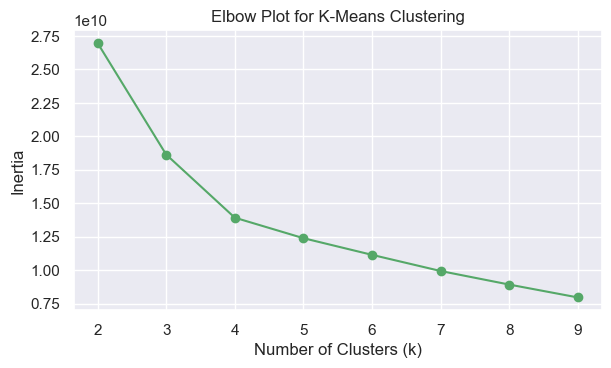

In [79]:
inertia = []
K_range = range(2 , 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)  

# Plot Elbow plot to find optimal number of cluster
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.plot(K_range, inertia, 'og-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for K-Means Clustering')


In [80]:
optimal_cluster= 5
print('The cluster from elbow analysis:', optimal_cluster)
# Fit the model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=50)
labels=kmeans.fit_predict(X_pca)

# Get cluster assignments for each data point
clusters_res = kmeans.labels_

# Get centroids of the clusters
c = kmeans.cluster_centers_


The cluster from elbow analysis: 5


In [81]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(clusters_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=100,
                    alpha=0.9,
                    marker='o', 
                    cmap='viridis', 
                    edgecolor='k',
                    label=f'cluster {cluster}')
        
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='yellow',
                    s=300,
                    label='centroids')
    
    plt.title(f'KMeans Clustering with {optimal_cluster} Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid()
    plt.show()

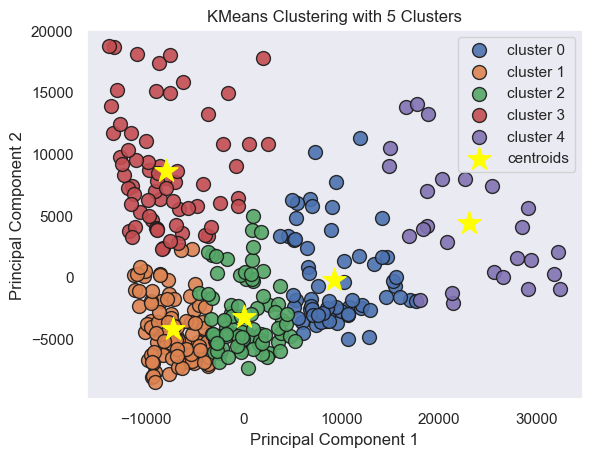

In [82]:
plot_clusters(X_pca, labels, plt_cluster_centers= True)


In [85]:
cluster_data = X_pca[0]
centroids=c.copy()
# variances in clusters
cluster_variance = np.var(cluster_data, axis=0)

 # new centroid and mean of the data points
new_centroid = np.mean(cluster_data, axis=0)
        
# Updating centroids
centroids[0] = new_centroid
new_centroid

-1451.8148892749039

In [86]:
# Cluster predictions
y_km = kmeans.fit_predict(X_test)
y_km

array([0, 4, 0, 0, 3, 3, 3, 1, 3, 3, 1, 0, 0, 1, 0, 4, 0, 1, 4, 3, 2, 1,
       1, 3, 0, 2, 1, 2, 3, 0, 3, 3, 3, 3, 1, 4, 0, 0])

In [87]:
X_test['Cluster']=y_km
X_test

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
162,15177,2024,3810,2665,232,610,0
82,10362,9232,11009,737,3537,2342,4
138,13537,4257,5034,155,249,3271,0
371,20105,1887,1939,8164,716,790,0
119,8258,2344,2147,3896,266,635,3
80,7005,829,3009,430,610,529,3
299,444,879,2060,264,290,259,3
298,6758,4560,9965,934,4538,1037,1
199,9670,2280,2112,520,402,347,3
290,2708,2160,2642,502,965,1522,3


In [91]:
# Segregating data based on cluster assignments
cluster_0=X_test[X_test['Cluster']==0]
cluster_1=X_test[X_test['Cluster']==1]
cluster_2=X_test[X_test['Cluster']==2]
cluster_3=X_test[X_test['Cluster']==3]
cluster_4=X_test[X_test['Cluster']==4]

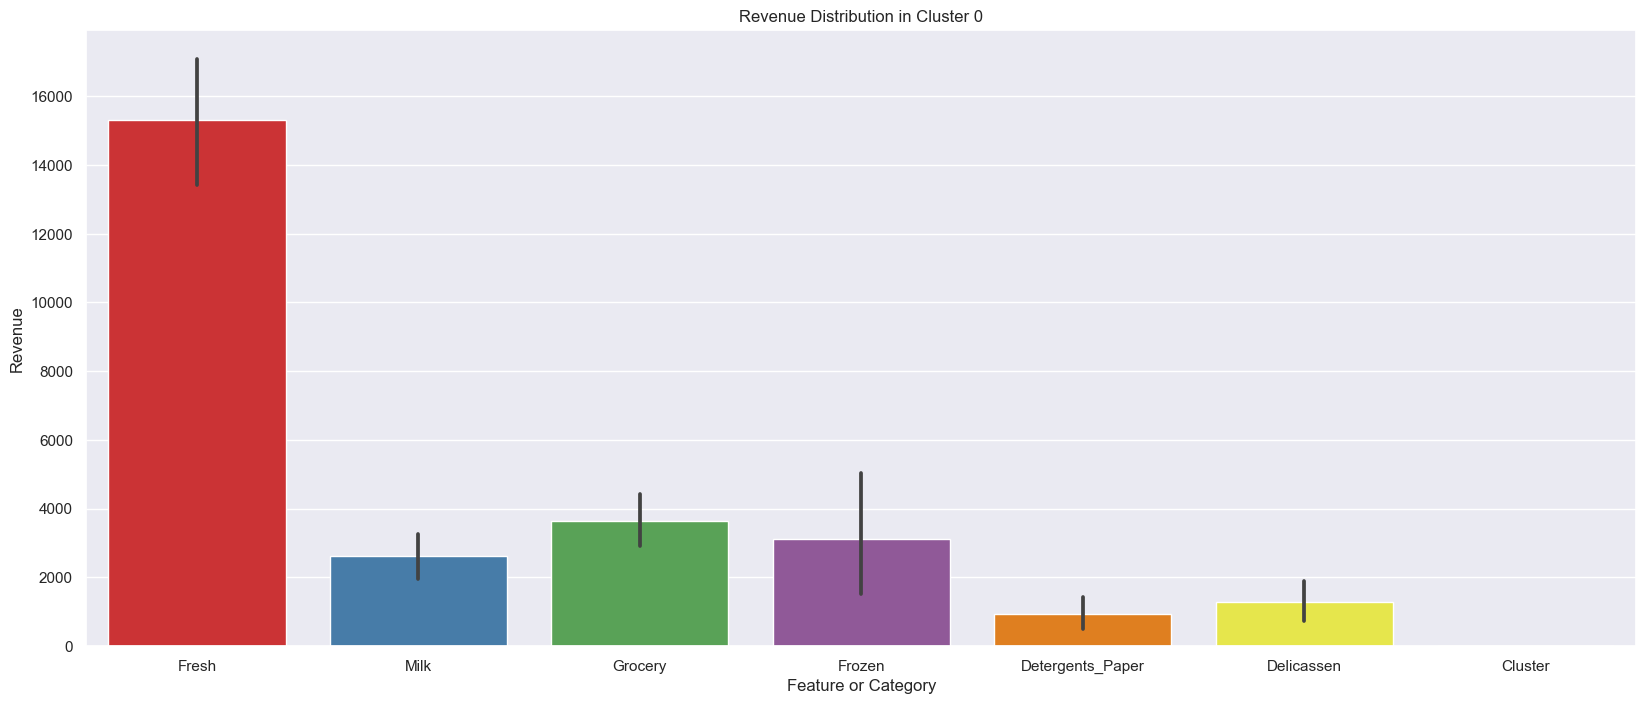

In [94]:
# Visualizing revenue distribution within Cluster 0
plt.figure(figsize=(20, 8))
sns.barplot(data=cluster_0, palette="Set1")
plt.title('Revenue Distribution in Cluster 0')
plt.xlabel('Feature or Category')
plt.ylabel('Revenue')
plt.show()

- Cluster_0: Fresh is higher than all others

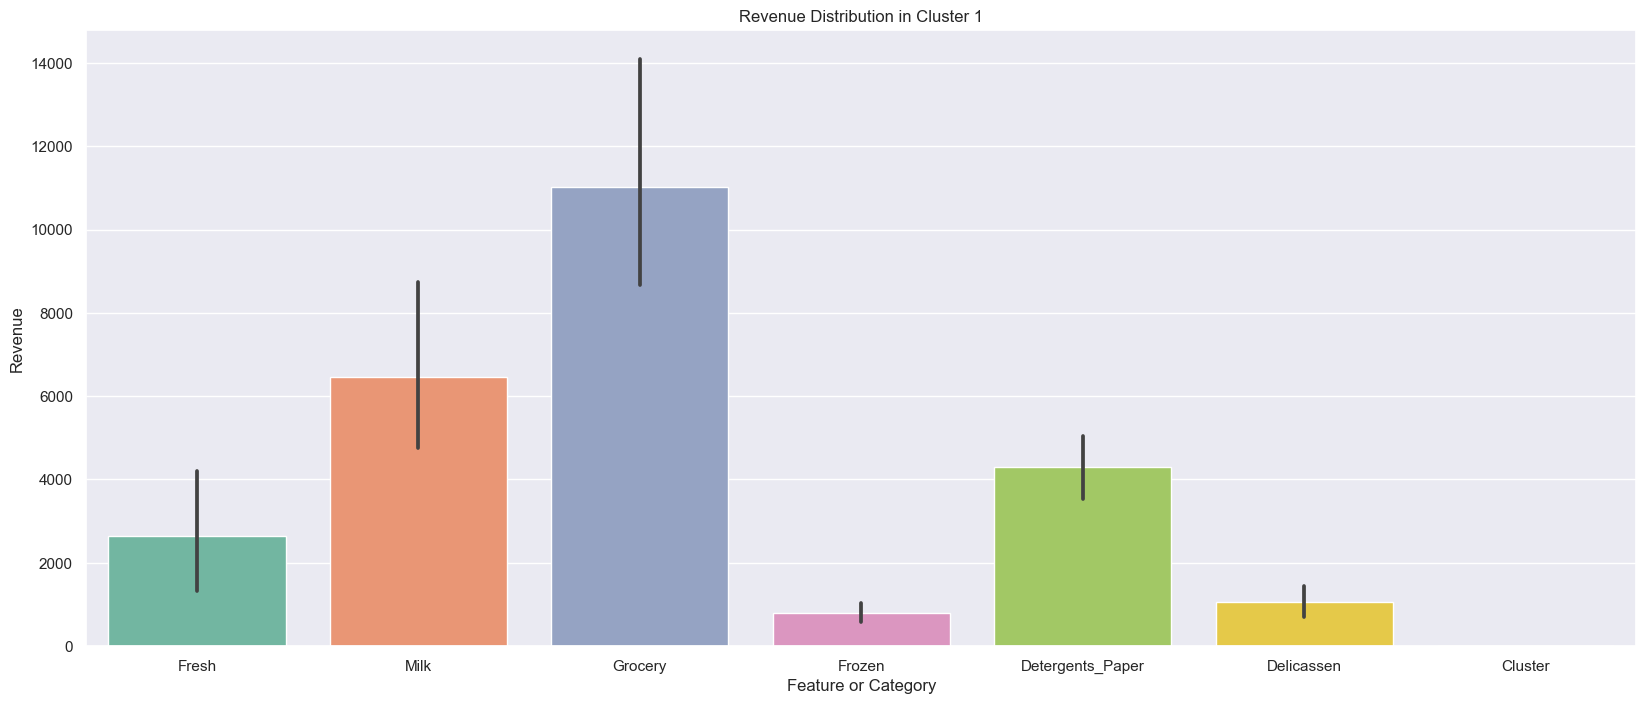

In [96]:
# Visualizing revenue distribution within Cluster 1
plt.figure(figsize=(20, 8))
sns.barplot(data=cluster_1, palette="Set2")
plt.title('Revenue Distribution in Cluster 1')
plt.xlabel('Feature or Category')
plt.ylabel('Revenue')
plt.show()

- Cluster_1: Fresh is grocery higher than all others

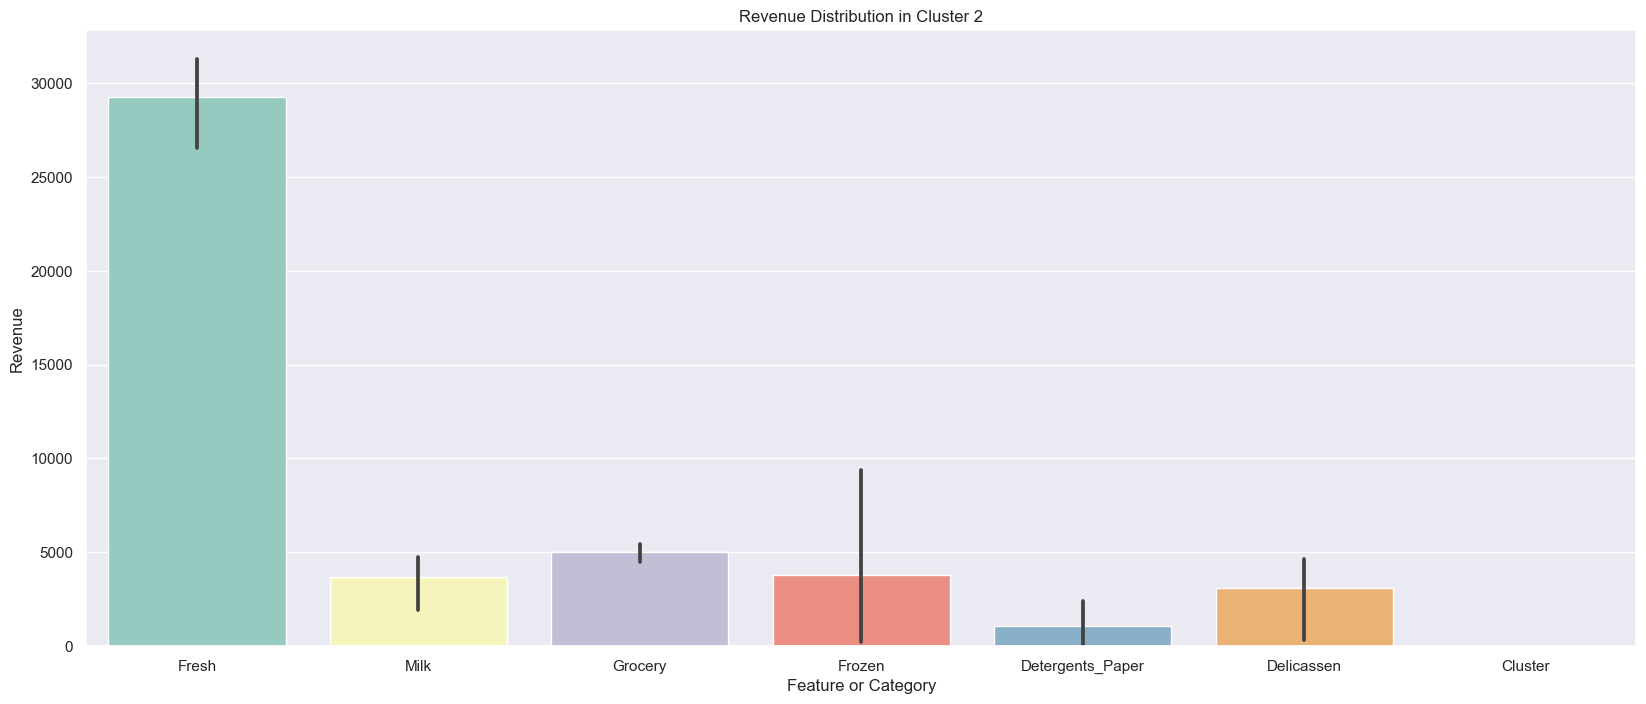

In [98]:
# Visualizing revenue distribution within Cluster 2
plt.figure(figsize=(20, 8))
sns.barplot(data=cluster_2, palette="Set3")
plt.title('Revenue Distribution in Cluster 2')
plt.xlabel('Feature or Category')
plt.ylabel('Revenue')
plt.show()

- Cluster_2: Fresh is higher than all others similar to cluster_0

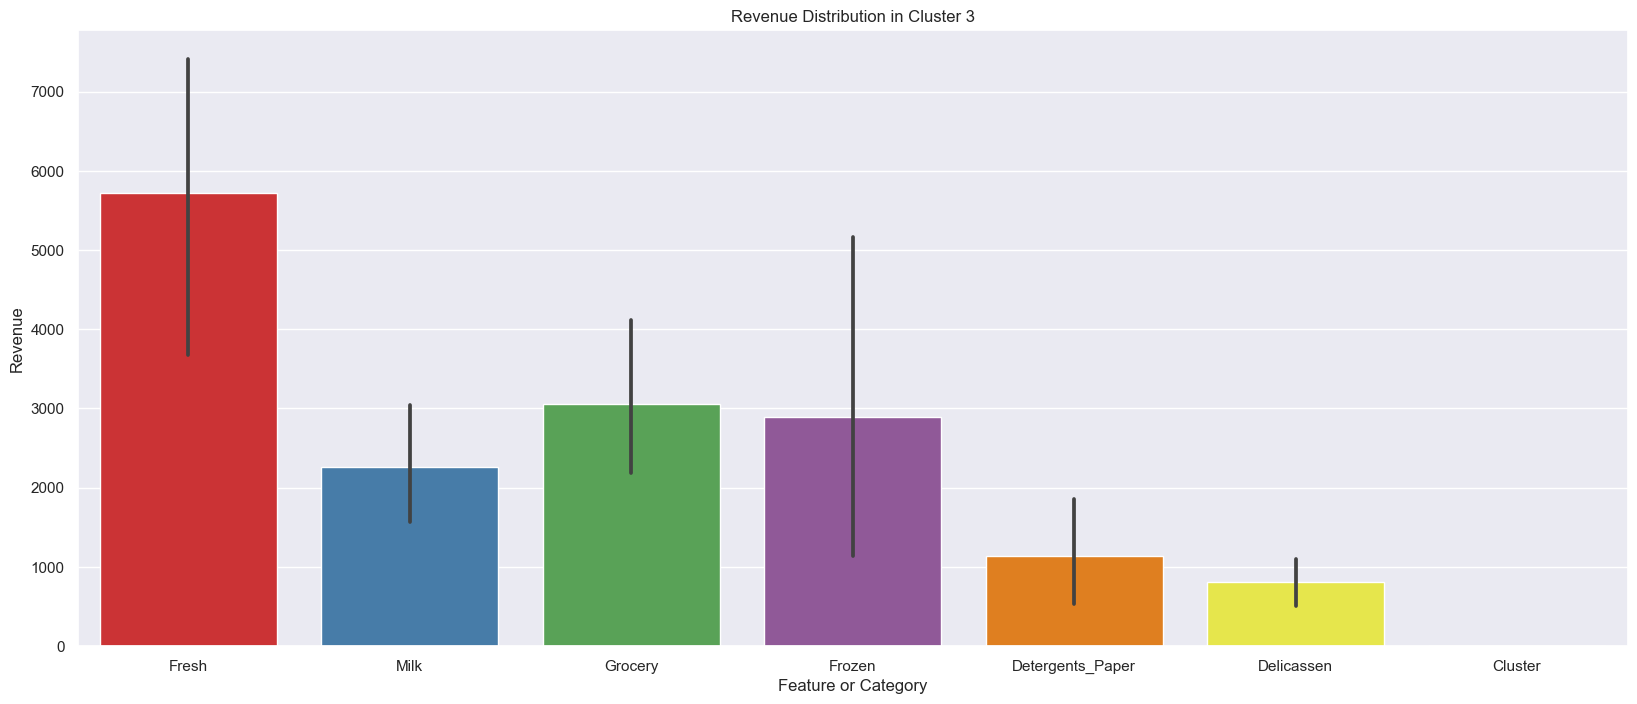

In [99]:
# Visualizing revenue distribution within Cluster 3
plt.figure(figsize=(20, 8))
sns.barplot(data=cluster_3, palette="Set1")
plt.title('Revenue Distribution in Cluster 3')
plt.xlabel('Feature or Category')
plt.ylabel('Revenue')
plt.show()

- Cluster_3: Fresh is higher than all others similar to cluster_0 and cluster_2

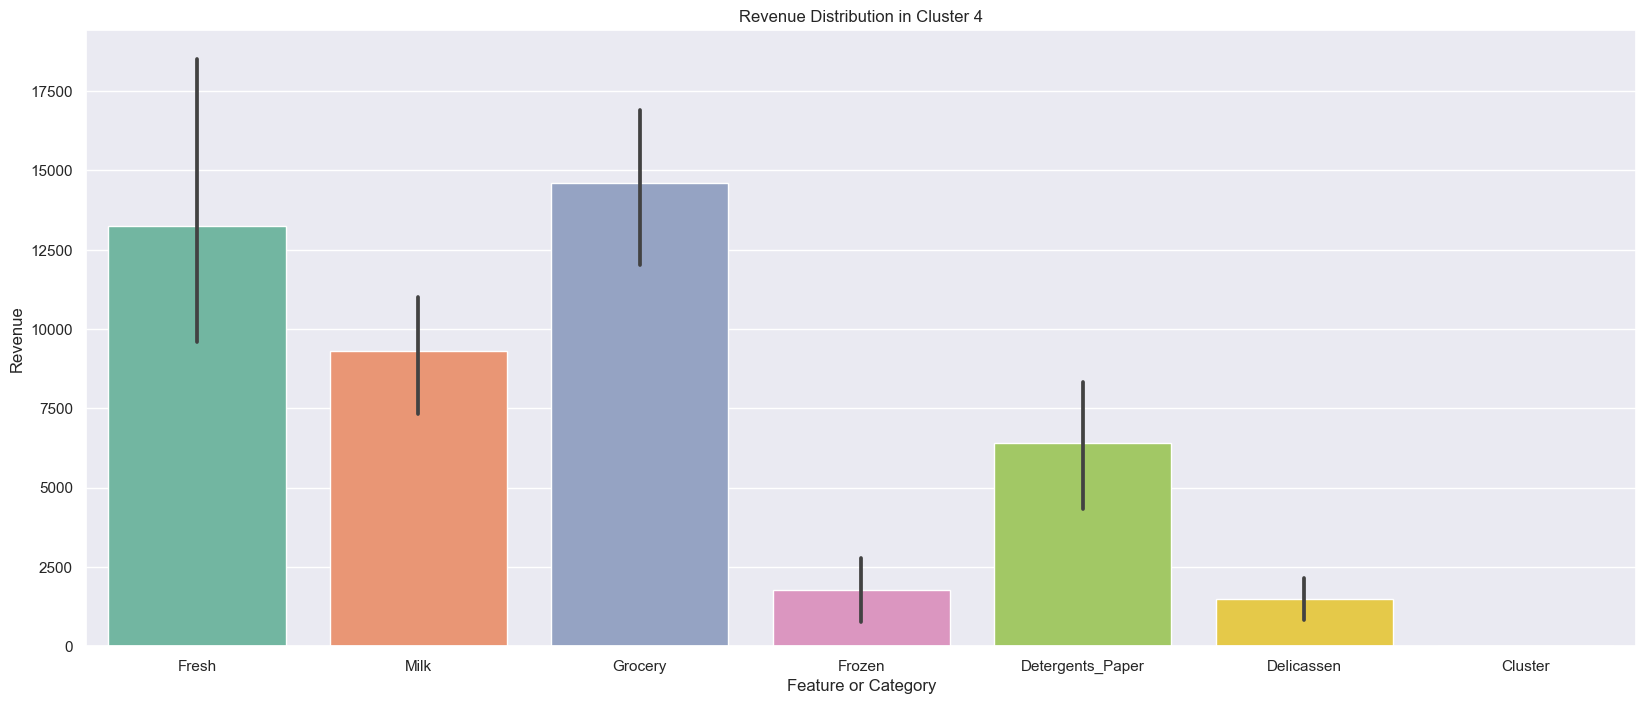

In [100]:
# Visualizing revenue distribution within Cluster 4
plt.figure(figsize=(20, 8))
sns.barplot(data=cluster_4, palette="Set2")
plt.title('Revenue Distribution in Cluster 4')
plt.xlabel('Feature or Category')
plt.ylabel('Revenue')
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [115]:
# imports
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import numpy as np
import matplotlib.pyplot as plt

In [116]:
plt.figure(figsize=(12, 9))
dend = sch.dend(sch.linkage(X_pca, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

AttributeError: module 'scipy.cluster.hierarchy' has no attribute 'dend'

<Figure size 1200x900 with 0 Axes>

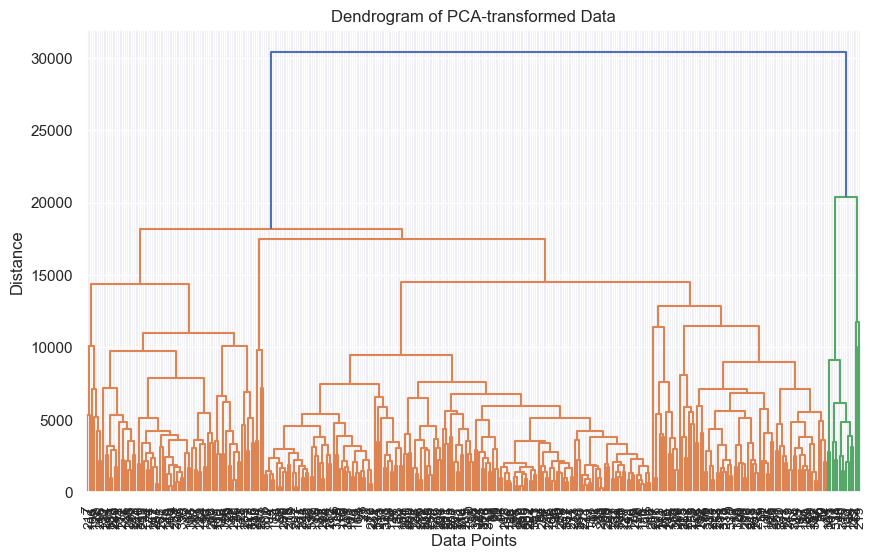

In [130]:
# Perform hierarchical clustering and compute linkage matrix
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
link_mat = linkage(X_pca, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(link_mat, leaf_font_size=10 )
plt.title('Dendrogram of PCA-transformed Data')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [131]:
# Create a function to calculate the optimal number of clusters
def opt_clusters(data, max_clusters):
    link_mat = linkage(data, method='average')
    last_merges = link_mat[-max_clusters+1:, 2]
    diff = np.diff(last_merges, n=2)
    optimal_clusters = np.argmax(diff) + 2
    return optimal_clusters

In [132]:
optimal= opt_clusters(X_pca, max_clusters=5 )
print('The optimal number of clusters:', optimal)

The optimal number of clusters: 3


In [133]:
# Create model
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='average',
                             n_clusters = 2)

cluster_labels = fcluster(link_mat, 2, criterion='maxclust')
y_hc= ac.fit_predict(X_pca)


In [134]:
def plot_hc_clusters(data, n_clusters):
    # Perform hierarchical clustering
    linkage_matrix = linkage(data, method='average')
    
    # Assign data points to clusters
    cluster_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k')
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title(f'Hierarchical Clustering with {n_clusters} Clusters')
    plt.grid(True)
    plt.show()
    
   

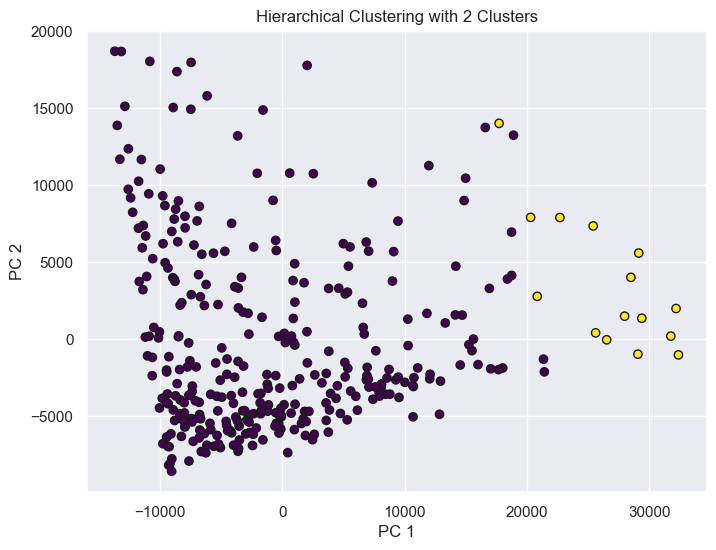

In [135]:
plot_hc_clusters(X_pca, 2)

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [137]:
#from sklearn.decomposition import PCA
pca_analysis = PCA(n_components=5)
pca_components = pca_analysis.fit_transform(X_std)

In [139]:
explained_var = pca_analysis.explained_variance_ratio_
print("Explained Variance Ratio:", explained_var)

Explained Variance Ratio: [0.4430011  0.23202818 0.13218618 0.11687938 0.0537406 ]


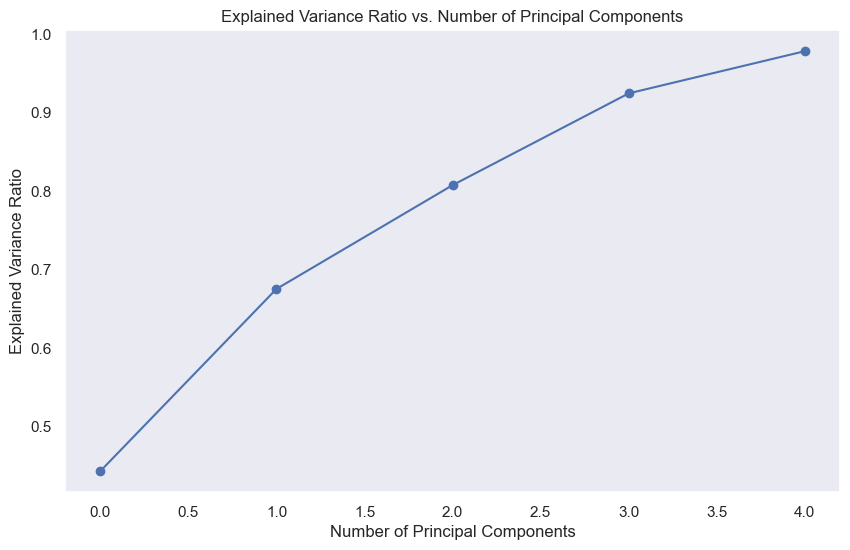

In [140]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_analysis.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.grid()
plt.show()

In [144]:
# Get the principal components and their corresponding feature names
components = pd.DataFrame(pca_analysis.components_, 
                        columns=df_mod.columns,
                        index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Print the principal components to see the feature weights
#print("Principal Components:")
components

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
PC1,-0.175401,0.518730,0.571687,-0.173780,0.565746,0.151851
PC2,0.557417,0.197256,0.066067,0.519733,-0.078369,0.608068
PC3,-0.569666,0.051987,0.030110,0.799558,0.038238,-0.176398
PC4,-0.565960,-0.147783,-0.168989,-0.214980,-0.136873,0.751227
PC5,-0.098269,0.810281,-0.320378,-0.111242,-0.456535,-0.101718


<Axes: >

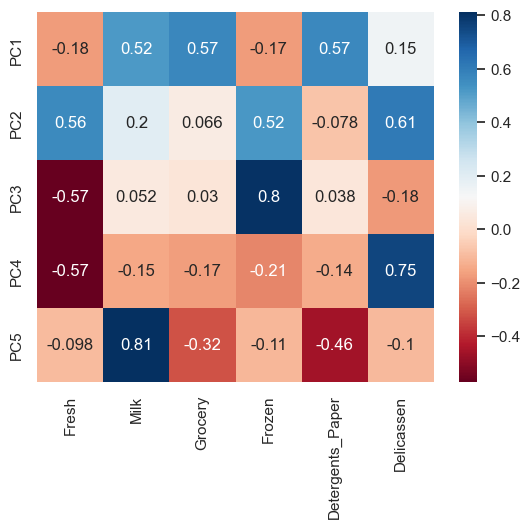

In [143]:
sns.heatmap(components, cmap='RdBu', annot= True)

- Principal Component 1: Emphasizes higher weights on Milk, Grocery, and Detergents_Paper, suggesting a possible convenience store business orientation.

- Principal Component 2: Exhibits higher weights on Fresh, Frozen, and Delicassen items, hinting at a profile more aligned with a restaurant.

- Principal Component 3: Indicates a predominant emphasis on Frozen items, aligning with characteristics seen in fast-food restaurant establishments.

- Principal Component 4: Demonstrates heavier emphasis on Delicassen items, resembling characteristics often found in a sandwich shop.

- Principal Component 5: Shows significant weights on Milk, pointing towards a possible coffee shop or milk small business office.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- Fresh stuff sells a lot, mostly to restaurants.
- We used K-means to find types of shoppers.
- With five main factors, we can guess about 90% of sales. These factors show who buys from cafes, restaurants, fast-food spots, and sandwich shops.
- Grocery things interest many buyers, but Fresh stuff is mostly bought by restaurants. Maybe because Fresh things spoil quickly, so fewer people buy them at a wholesale store. Selling less Fresh items could attract other buyers.